<h2>Importing the Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

<h2> Importing the DataSet 

In [7]:
import os 
os.chdir(r'D:\IIT Tirupati\ML and Data Science Research Basics\2)Regression\Polynomial Regression')
print(os.getcwd())
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values 
y = dataset.iloc[:,-1 ].values
print(x)
print(y)
y = y.reshape(len(y) , 1 ) # in this we are converting all the column into row type like . 
print(y) 


D:\IIT Tirupati\ML and Data Science Research Basics\2)Regression\Polynomial Regression
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


<h2> Feature Scaling 

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() 
sc_y = StandardScaler() 
x= sc_x.fit_transform(x)
y=sc_y.fit_transform(y)
print(x) 
print(y) # we done the scaling so that all the features have the standarization and in this way the ML model will not be biased towards the one features 


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


<h2> Training the SVR Model on whole dataset 

In [12]:
from sklearn.svm import SVR 
regressor = SVR( kernel = 'rbf') #Rbf is the choice because this will solve the complex relationship between the Target Value and the input 
regressor.fit(x , y ) 


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<h2> Testing 

In [14]:
#sc_y.inverse_tranform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))
#sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

<h2> Visulaing the Result 

AttributeError: 'StandardScaler' object has no attribute 'inverse_tranform'

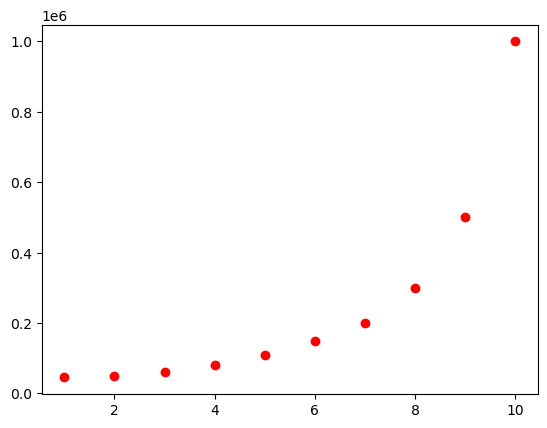

In [15]:
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y) , color = 'red')
plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_tranform(regressor.predict(x).reshape(-1,1)) , color = 'blue')
plt.tile('Truth or Bluff(SVR)')
plt.xlabel('position Level')
plt.ylabel('Salary')
plt.show()